# Data Understanding


## Context

Sebuah perusahaan memberikan data Human Resource untuk mengetahui kinerja karyawannya. Dari data yang diberikan, perusahaan ingin mendapatkan insight untuk menganalisa karyawannya agar dapat di evaluasi, sehingga nantinya mereka dapat menerapkan kebijakan yang tepat sasaran.

## Informasi Database

sumber database : https://drive.google.com/drive/folders/1G9Q2sohMFVes7NCHaUHcuAAjlOybBYJG

Database yang dimiliki memiliki 7 Tabel, yaitu :
1. Countries : Menyimpan informasi tentang data nama negara.
2. Departments : Menyimpan informasi tentang data macam macam departemen.
3. Employees : Menyimpan semua informasi karyawan serta struktur organisasi.
4. Job history : Menyimpan semua informasi karyawan mengenai sejarah pekerjaan.
5. Job : Menyimpan semua informasi karyawan mengenai jabatan pekerjaan dan range gajinya.
6. Locations : Menyimpan informasi tentang data lokasi.
7. Regions : Menyimpan informasi tentang data nama daerah.


## Import  Database

In [1]:
import pandas as pd

import mysql.connector as sqlcon

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Rahasiadon9',
    database = 'HR'
)

In [2]:
## querry function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    sql = pd.DataFrame(result, columns=curs.column_names)
    return sql

###### Memilih Kolom Table Yang Sesuai Untuk Dianalisa

data yang dipilihi adalah data yang akan digunakan untuk dianalisa dan data tersebut diambil dari dua table dan digabungkan, table yang digunakan adalah
- table `employees`, memiliki kolom :
1. `First_Name`
2. `Last_Name`
3. `Job_ID`
4. `Salary`
5. `Commission_PCT`

- table `Jobs`, memiliki kolom :
1. `Job_Title`
2. `Min_Salary`
3. `Max_Salary`


In [3]:
## query

tabel = sql_table('''
select e.First_Name, e.Last_Name, e.Job_ID, e.Salary, e.Commission_PCT,
j.Job_Title, j.Min_Salary, j.Max_Salary from employees e LEFT JOIN Jobs j on e.Job_Id = j.Job_Id''')
tabel.head()

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,Job_Title,Min_Salary,Max_Salary
0,Steven,King,AD_PRES,24000.00,0.00,President,20000,40000
1,Neena,Kochhar,AD_VP,17000.00,0.00,Administration Vice President,15000,30000
2,Lex,De Haan,AD_VP,17000.00,0.00,Administration Vice President,15000,30000
3,Alexander,Hunold,IT_PROG,9000.00,0.00,Programmer,4000,10000
4,Bruce,Ernst,IT_PROG,6000.00,0.00,Programmer,4000,10000


## Data Anomali

In [4]:
## cek info dari table

tabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   First_Name      107 non-null    object
 1   Last_Name       107 non-null    object
 2   Job_ID          107 non-null    object
 3   Salary          107 non-null    object
 4   Commission_PCT  107 non-null    object
 5   Job_Title       107 non-null    object
 6   Min_Salary      107 non-null    object
 7   Max_Salary      107 non-null    object
dtypes: object(8)
memory usage: 6.8+ KB


##### Mengubah tipe data yang salah


In [7]:
tabel['Salary'] = pd.to_numeric(tabel['Salary'])
tabel['Commission_PCT'] = pd.to_numeric(tabel['Commission_PCT'])

In [8]:
## recheck data type

tabel.dtypes

First_Name         object
Last_Name          object
Job_ID             object
Salary            float64
Commission_PCT    float64
Job_Title          object
Min_Salary         object
Max_Salary         object
dtype: object

###### Check Missing Value

In [9]:
tabel.isna().sum()

First_Name        0
Last_Name         0
Job_ID            0
Salary            0
Commission_PCT    0
Job_Title         0
Min_Salary        0
Max_Salary        0
dtype: int64

###### tidak ada missing vallue
karena tidak ada missing vallue dari kolom yang digabungkan, maka tidak perlu drop kolom atau handling missing value

In [10]:
## chcek data duplicate 
tabel[tabel.duplicated()]

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,Job_Title,Min_Salary,Max_Salary


In [11]:
## tidak ada duplikasi data

###### Tambah Kolom Baru / penambahan feature 'Komisi'

In [12]:
tabel['Komisi']=tabel['Commission_PCT'] * tabel['Salary']
tabel

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,Job_Title,Min_Salary,Max_Salary,Komisi
0,Steven,King,AD_PRES,24000.0,0.0,President,20000,40000,0.0
1,Neena,Kochhar,AD_VP,17000.0,0.0,Administration Vice President,15000,30000,0.0
2,Lex,De Haan,AD_VP,17000.0,0.0,Administration Vice President,15000,30000,0.0
3,Alexander,Hunold,IT_PROG,9000.0,0.0,Programmer,4000,10000,0.0
4,Bruce,Ernst,IT_PROG,6000.0,0.0,Programmer,4000,10000,0.0
...,...,...,...,...,...,...,...,...,...
102,Pat,Fay,MK_REP,6000.0,0.0,Marketing Representative,4000,9000,0.0
103,Susan,Mavris,HR_REP,6500.0,0.0,Human Resources Representative,4000,9000,0.0
104,Hermann,Baer,PR_REP,10000.0,0.0,Public Relations Representative,4500,10500,0.0
105,Shelley,Higgins,AC_MGR,12000.0,0.0,Accounting Manager,8200,16000,0.0


In [13]:
### describe dari data yang dipilih

dataDesc = []
for i in tabel.columns:
    dataDesc.append([
        i,
        tabel[i].dtypes,
        tabel[i].isna().sum(),
        round((tabel[i].isna().sum() / len(tabel)), 2),
        tabel[i].nunique(),
        tabel[i].sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,First_Name,object,0,0.0,91,"[Kimberely, Jean]"
1,Last_Name,object,0,0.0,102,"[Davies, Sullivan]"
2,Job_ID,object,0,0.0,19,"[SH_CLERK, FI_MGR]"
3,Salary,float64,0,0.0,57,"[2900.0, 3100.0]"
4,Commission_PCT,float64,0,0.0,8,"[0.0, 0.0]"
5,Job_Title,object,0,0.0,19,"[Sales Representative, Purchasing Clerk]"
6,Min_Salary,object,0,0.0,14,"[2500, 3000]"
7,Max_Salary,object,0,0.0,13,"[5500, 5500]"
8,Komisi,float64,0,0.0,32,"[0.0, 0.0]"


###### Check Outliers

In [14]:
tabel.describe()

,Salary,Commission_PCT,Komisi
count,107.000000,107.000000,107.000000
mean,6461.682243,0.072897,688.691589
std,3909.365746,0.115595,1191.362653
min,2100.000000,0.000000,0.000000
25%,3100.000000,0.000000,0.000000
50%,6200.000000,0.000000,0.000000
75%,8900.000000,0.150000,1072.500000
max,24000.000000,0.400000,5600.000000


In [15]:
q1 = tabel.describe()['Komisi']['25%']
q3 = tabel.describe()['Komisi']['75%']
iqr = q3-q1
upper_f = q3 + (1.5 * iqr)
lower_f = q1 - (1.5 * iqr)
outliers = tabel[(tabel['Komisi'] < lower_f) | (tabel['Komisi'] > upper_f)]
outliers

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,Job_Title,Min_Salary,Max_Salary,Komisi
45,John,Russell,SA_MAN,14000.0,0.40,Sales Manager,10000,20000,5600.0
46,Karen,Partners,SA_MAN,13500.0,0.30,Sales Manager,10000,20000,4050.0
47,Alberto,Errazuriz,SA_MAN,12000.0,0.30,Sales Manager,10000,20000,3600.0
48,Gerald,Cambrault,SA_MAN,11000.0,0.30,Sales Manager,10000,20000,3300.0
50,Peter,Tucker,SA_REP,10000.0,0.30,Sales Representative,6000,12000,3000.0
56,Janette,King,SA_REP,10000.0,0.35,Sales Representative,6000,12000,3500.0
57,Patrick,Sully,SA_REP,9500.0,0.35,Sales Representative,6000,12000,3325.0
58,Allan,McEwen,SA_REP,9000.0,0.35,Sales Representative,6000,12000,3150.0
68,Lisa,Ozer,SA_REP,11500.0,0.25,Sales Representative,6000,12000,2875.0
74,Ellen,Abel,SA_REP,11000.0,0.30,Sales Representative,6000,12000,3300.0


In [16]:
import matplotlib.pyplot as plt

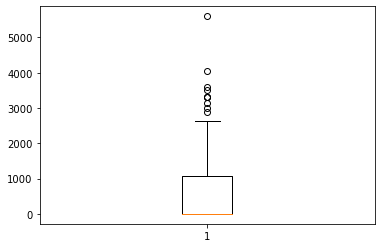

In [17]:
plt.boxplot(tabel['Komisi'])
plt.show()

banyak outliers ditemukan, dari sini outliers didapatkan dari data yang diambil dari komisi yang didapatkan oleh karyawan. Nilai outliers tertingginya 5600

In [18]:
### menyimpan data ke csv

tabel.to_csv('Data_HR.csv')

### Data Visualization

###### 1. Divisi apa yang mendapatkan Komisi Terbanyak?

In [19]:
pd.crosstab(index=tabel['Job_Title'], columns='Total', values=tabel['Komisi'], aggfunc='sum').sort_values('Total', ascending=False)

col_0,Total
Job_Title,
Sales Representative,55040.0
Sales Manager,18650.0
Accountant,0.0
Public Accountant,0.0
Stock Clerk,0.0
Shipping Clerk,0.0
Purchasing Manager,0.0
Purchasing Clerk,0.0
Public Relations Representative,0.0


In [20]:
from IPython.display import Image
Image(url="komdis.jpeg", width=400, height=300)

- `Insight` = Divisi yang mendapatkan total komisi terbanyak yaitu =
1. Sales Representative dengan total Komisi = 55,040.0 
2. Sales Manajer dengan total Komisi = 18,650

`Rekomendasi` :

Divisi sales representative dan sales manager telah mendapatkan komisi, sehingga target perusahaan terpenuhi, oleh karena itu untuk dua divisi tersebut di periode selanjutnya agar dinaikan lagi targetnya dengan diimbangi kenaikan komisi, supaya penjualan perusahaan dapat naik dan berkembang sehingga berdampak untuk kemajuan dari segi pendapatan perusahaan. Dan untuk divisi yang tidak mendapatkan komisi agar dilakukan evaluasi kembali kinerjanya yang berdampak pada pertumbuhan dan perkembangan perusahaan yang lebih maju.


###### 2. Siapa Karyawan Yang Mendapatkan Posisi Tiga Besar Dari Komisi Tertinggi?

In [21]:
Komisi = pd.DataFrame([tabel['First_Name'],tabel['Last_Name'], tabel['Salary'],tabel['Commission_PCT'] ,tabel['Komisi'], tabel['Job_Title']]).T.sort_values(['Commission_PCT', 'Komisi'], ascending=False).reset_index().head(10)
Komisi

,index,First_Name,Last_Name,Salary,Commission_PCT,Komisi,Job_Title
0,45,John,Russell,14000.0,0.4,5600.0,Sales Manager
1,56,Janette,King,10000.0,0.35,3500.0,Sales Representative
2,57,Patrick,Sully,9500.0,0.35,3325.0,Sales Representative
3,58,Allan,McEwen,9000.0,0.35,3150.0,Sales Representative
4,46,Karen,Partners,13500.0,0.3,4050.0,Sales Manager
5,47,Alberto,Errazuriz,12000.0,0.3,3600.0,Sales Manager
6,48,Gerald,Cambrault,11000.0,0.3,3300.0,Sales Manager
7,74,Ellen,Abel,11000.0,0.3,3300.0,Sales Representative
8,50,Peter,Tucker,10000.0,0.3,3000.0,Sales Representative
9,59,Lindsey,Smith,8000.0,0.3,2400.0,Sales Representative


In [22]:
Image(url="gam2.jpeg", width=500, height=500)

- ` insight` : Karyawan / employee yang mendapatkan peringkat tiga dari komisi tertinggi adalah
1. John Russel dari divisi Sales Manager
2. Janette King dari divisi Sales Representative
3. Patric Sully dari divisi Sales Representative

- `rekomendasi` :

1. karyawan yang mendapatkan komisi tertinggi dari masing-masing divisi bisa dievaluasi untuk dijadikan seperti group leader agar divisinya semakin berkembang / kualitas SDMnya merata yang dapat berpengaruh ke pertumbuhan keuangan perusahaan.
2. divisi Sales Representative adalah sales yang ditunjuk disuatu wilayah yang mana ditempat tersebut perusahaan tidak ada kegiatan produksi / hanya memasarkan produk dari perusahaan saja, apabila perusahaan ingin memperluas pasarnya di wilayah baru yang mana hanya ada kegiatan penjualan produk saja, maka nama-nama dari karyawan yang mendapatkan bonus tertinggi dikirim untuk dijadikan leader di wilayah baru tersebut.

In [23]:
tabel.to_csv('Data_HR_fix.csv')

###### 3. Bagaimana Korelasi Antara Salary (gaji), Commission_PCT, dan Komisi?

In [24]:
tabel.corr()

,Salary,Commission_PCT,Komisi
Salary,1.000000,0.486179,0.510374
Commission_PCT,0.486179,1.000000,0.972791
Komisi,0.510374,0.972791,1.000000


In [25]:
import seaborn as sns

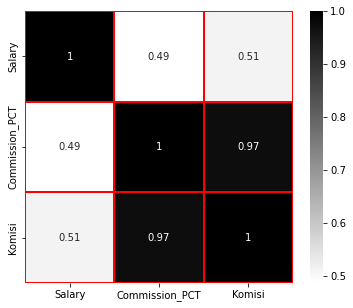

In [26]:
plt.figure(figsize=(6,5))
sns.heatmap(tabel.corr(), annot=True, cmap='binary', linewidth=2, linecolor='red')
plt.show()

- `Insight` 

1. Korelasi antara Salary dengan Persentase Komisi (Commission_PCT) yaitu 0.49 = berkorelasi positif
2. Korelasi antara Salary dengan Komisi yaitu 0.51 = berkorelasi positif
3. Korelasi Komisi dan Presentase Komisi (Commission_PCT) yaitu 0.97 = berkorelasi positif dan kuat


###### 4. Uji Hipotesis

In [27]:
from scipy.stats import shapiro

In [28]:
norm, pval = shapiro(tabel['Komisi'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DISTRIBUSI TIDAK NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (1.2005068265169821e-14 < 5%)
DISTRIBUSI TIDAK NORMAL


### mann whitneyu

uji hipotesis median dari salary, job_title : sales manager dan sales representative

In [29]:
from scipy.stats import mannwhitneyu
mann, pval = mannwhitneyu(
    tabel[tabel['Job_Title'] == 'Sales Representative']['Salary'],
    tabel[tabel['Job_Title'] == 'Sales Manager']['Salary']
) 

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Salary Antara Sales Manager dan Sales Representative')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Salary Antara Sales Manager dan Sales Representative')

Tolak H0 Karena P-Value (0.0008759786723532222 < 5%)
Terdapat Perbedaan Nilai Median Salary Antara Sales Manager dan Sales Representative


karena salary tidak terdistribusi normal, sehingga saya menggunakan uji non parametrik, dan menggunakan mann whitneyu.

berdasarkan dari hasil uji non parametrik hasilnya tolak H0 karena p value kurang daru 5% dan terdapat Perbedaan Nilai Median Salary Antara Sales Manager dan Sales Representative